# <center>Verovatnoća i statistika - Završni projekat</center>
## <center>Marko Dojkić 2018/201682, SII Beograd</center>
### <center>Podaci o najgledanijim video sadržajma sa Youtube platforme (na dan 14.11.2017.) u SAD-u</center>

In [13]:
import pandas as pd # Učitavanje pandas biblioteke pomoću koje ćemo učitati .csv fajl sa podacima
import matplotlib.pyplot as plt # Učitavanje biblioteke za crtanje grafikona

data = pd.read_csv("USvideos.csv") # Učitavanje podataka i smeštanje u promenjljivu data
data.head() # Prikaz prvih redova (tj. podataka o prvih 5 video sadržaja) za kratak pregled

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
1,9wg3v-01yKQ,17.14.11,Harry Styles - Kiwi,HarryStylesVEVO,10,2017-11-08T13:00:01.000Z,"Columbia|""Harry Styles""|""Kiwi""|""Pop""",9632678,810895,16139,59473,https://i.ytimg.com/vi/9wg3v-01yKQ/default.jpg,False,False,False,Harry Styles' self-titled debut album is avail...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158531,787419,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,g5c1bk8weaQ,17.14.11,FIRST TIME IM DOING THIS! TALKS WITH LIZA.,Liza Koshy,23,2017-11-10T03:43:43.000Z,"liza|""lizza""|""lizzza""|""lizzzavine""|""lizzzak""|""...",3578502,307435,2573,12248,https://i.ytimg.com/vi/g5c1bk8weaQ/default.jpg,False,False,False,"Having kids, having anxiety and not having boo..."
4,pz95u3UVpaM,17.14.11,Camila Cabello - Havana (Vertical Video) ft. Y...,CamilaCabelloVEVO,10,2017-11-10T05:01:00.000Z,"camila cabello|""camila""|""young thug""|""havana""|...",5476737,286268,4083,12254,https://i.ytimg.com/vi/pz95u3UVpaM/default.jpg,False,False,False,Havana – Spotify Vertical Video \nVideo Direct...


# 1. Određivanje bezuslovnih i uslovnih verovatnoća
## <center>- Verovatnoća da video materijal pripada određenoj kategoriji (A)</center>
## <center>&emsp;- Verovatnoća da video materijal ima bar milion pregleda (B)</center>
## <center>&emsp;- Uslovna verovatnoća P(B|A), tj. da video ima bar milion pregleda pod uslovom da pripada određenoj kategoriji</center>

Verovatnoća da video sadržaj pripada određenoj kategoriji:


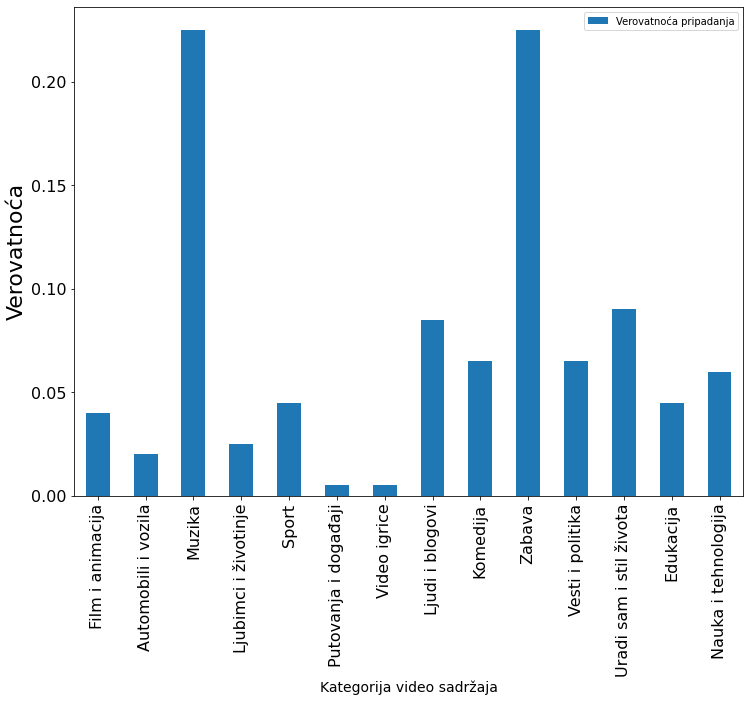

In [14]:
category_count = data["category_id"].value_counts() # Računanje broja video materijala u svakoj kategoriji

P_video_to_belong_to_certain_category = pd.DataFrame((category_count/category_count.sum()).sort_index())
# Kalkulacija verovatnoće po formuli (pojedinačne vrednosti/ukupan zbir) - sortirano po indeksu

P_video_to_belong_to_certain_category.index = ["Film i animacija", "Automobili i vozila", "Muzika", 
                                               "Ljubimci i životinje","Sport", "Putovanja i događaji", "Video igrice", 
                                               "Ljudi i blogovi", "Komedija", "Zabava", "Vesti i politika", 
                                               "Uradi sam i stil života", "Edukacija", "Nauka i tehnologija"]
# Konverzija iz brojevnih indeksa u imena kategorija

P_video_to_belong_to_certain_category.columns = ["Verovatnoća pripadanja"] #Imenovanje kolone

print("Verovatnoća da video sadržaj pripada određenoj kategoriji:")
P_video_to_belong_to_certain_category.plot.bar(figsize=(12,9),fontsize=16) # Crtanje grafikona (12x9, veličina fonta 16)
plt.xlabel("Kategorija video sadržaja",fontsize=14) # Postavljanje labele na x osu (veličina fonta 14)
plt.ylabel("Verovatnoća",fontsize=22) # Postavljanje labele na y osu (veličina fonta 22)
plt.show() # Prikaz grafikona

## Na osnovu ovog grafikona vidimo da su tog dana bili najgledaniji sadržaji iz kategorije "Muzike" i "Zabave"

Verovatnoća da video sadržaj ima bar 100k pregleda:


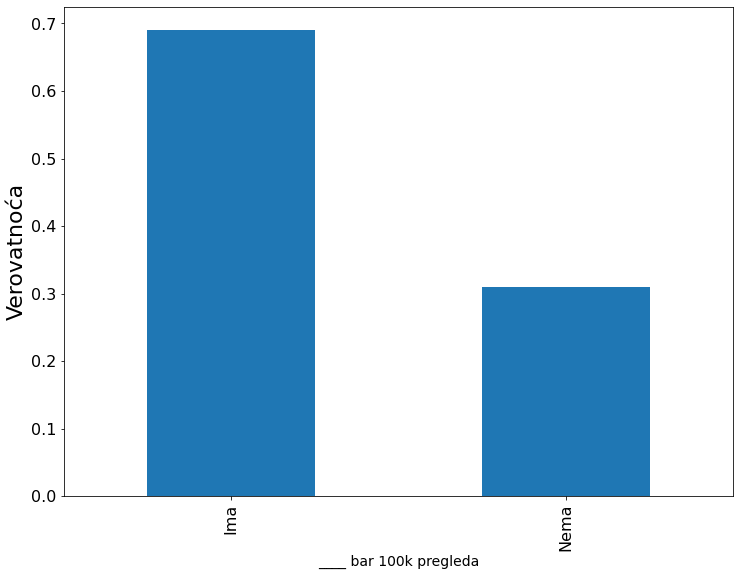

In [15]:
views_over_milion_or_not_count = (data["views"]>=100000).value_counts() 
# Računanje broja video materijala čiji je broj pregleda bar milion i onih koji taj uslov ne ispunjavaju

P_video_has_over_million_views = views_over_milion_or_not_count/views_over_milion_or_not_count.sum() 
# Kalkulacija verovatnoće po formuli
P_video_has_over_million_views.index = ["Ima","Nema"] # Imenovanje indeksa
print("Verovatnoća da video sadržaj ima bar 100k pregleda:")
P_video_has_over_million_views.plot.bar(figsize=(12,9),fontsize=16) # Crtanje grafikona
plt.xlabel("____ bar 100k pregleda", fontsize=14)
plt.ylabel("Verovatnoća",fontsize=22)
plt.show() # Prikaz grafikona

## Možemo zaključiti da će u 80% slučajeva video imati bar milion pregleda, što je nekako i očekivano za "trending" u zemlji koja ima veliku populaciju kao što je SAD.

Verovatnoća da će video određene kategorije imati bar 100k pregleda:


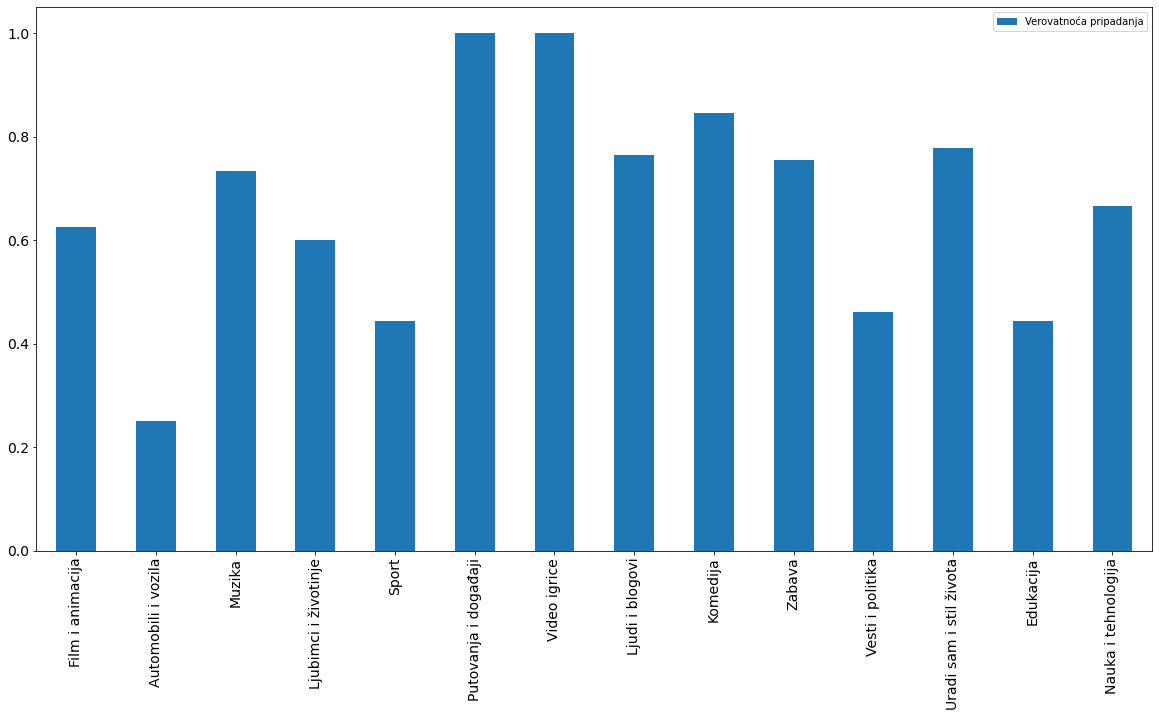

In [21]:
data_views_over_milion_category = data.loc[data["views"]>=100000, "category_id"]
#Odvajanje video sadržaja koji imaju bar milion pregleda po kategorijama
P_that_video_is_certain_category_under_condition_that_it_has_views_over_million = pd.DataFrame((data_views_over_milion_category.value_counts()/data_views_over_milion_category.shape[0]).sort_index())
#Kalkulacija apriorne verovatoće po formuli sa sortiranim indeksom
P_that_video_is_certain_category_under_condition_that_it_has_views_over_million.index = ["Film i animacija", 
                                                            "Automobili i vozila", "Muzika", "Ljubimci i životinje",
                                     "Sport", "Putovanja i događaji", "Video igrice", "Ljudi i blogovi", "Komedija", 
                        "Zabava", "Vesti i politika", "Uradi sam i stil života", "Edukacija", "Nauka i tehnologija"]
#Raspored je promenjen pa moramo da preimenujemo indekse ponovo
P_that_video_is_certain_category_under_condition_that_it_has_views_over_million.columns=["Verovatnoća pripadanja"]
P_that_video_is_certain_category_under_condition_that_it_has_views_over_million.columns.name = "Kategorija"

P_that_video_might_have_over_million_views_under_condition_it_is_certian_category = P_that_video_is_certain_category_under_condition_that_it_has_views_over_million * P_video_has_over_million_views.loc["Ima"] / P_video_to_belong_to_certain_category
#Kalkulacija aposterione verovatnoće po Bajesovoj formuli

print("Verovatnoća da će video određene kategorije imati bar 100k pregleda:")
pd.DataFrame(P_that_video_might_have_over_million_views_under_condition_it_is_certian_category).plot.bar(figsize=(20,10), fontsize=14).legend(loc="best")
plt.show()

## Ovaj grafikon nam pokazuje da je najveća šansa da video sadržaj iz kategorije "Putovanja i događaj" i "Video igrice" imaju najveću (i podjednaku) šansu da imaju preko 100k pregleda (tj. da budu najgledaniji tog dana), mada je odstupanje ostalih kategorija jako malo zbog malog broja uzoraka.

## 2. Estimacija parametara raspodela pojedinačnih promenljivih

In [17]:
data_ep = pd.read_csv("USvideos.csv", usecols=["likes","dislikes"]) #Odvajanje potrebnih kolona u zasebnu promenjljivu
#print(data_ep.head())
data_ep.describe() #Ispisivanje svih parametara raspodela

,likes,dislikes
count,2.000000e+02,200.00000
mean,3.818818e+04,1354.38000
std,1.439799e+05,4087.56599
min,0.000000e+00,0.00000
25%,1.967250e+03,68.25000
50%,7.361500e+03,200.00000
75%,2.019150e+04,946.25000
max,1.634124e+06,43420.00000


## <center>Na osnovu ove tabele, možemo zaključiti sledeće:</center>
### - Broj sviđanja je znatno veći od broja nesviđanja, što je očekivan rezultat.
### - Nakon poslednjeg kvantila imamo nagli porast, što pokazuje da mali broj video sadržaja ima znatno veće reakcije, što pokazuje da četvrtina uzorka ima veću popularnost od ostatka, što i potvrđuje velika vrednost standardne devijacije.

# 3.Estimacija parametara združenih raspodela (kovarijansa i koeficijent korelacije)

In [18]:
print("Matrica kovarijanse: \n", data_ep.cov())

koef_korelacije=data_ep.cov()['likes']['dislikes']/(data_ep.cov()['likes']['likes']*data_ep.cov()['dislikes']['dislikes'])**0.5
print("\nKoeficijent korelacije: ", koef_korelacije)

Matrica kovarijanse: 
                  likes      dislikes
likes     2.073022e+10  4.268718e+08
dislikes  4.268718e+08  1.670820e+07

Koeficijent korelacije:  0.7253218323955326


## <center>Pozitivan koeficijen korelacije znači da u proseku kako broj sviđanja raste, broj nesviđanja raste, što je i očekivan rezultat za video sadržaj koji su najgledaniji.</center>

# 4. Testiranje parametarskih hipoteza (nad brojem komentara)

## <center>Šapiro-Wilk test normalnost</center>
### <center>- H0: Uzorak broja komentara je iz normalne raspodele </center>
### <center>- H1: Uzorak broja komentara nije iz normalne raspodele</center>

In [19]:
from scipy.stats import shapiro #učitavanje modula za Šapiro-Wilk test iz biblioteke scipy.stats

data_swt = pd.read_csv("USvideos.csv", usecols=["comment_count"]) #Odvajanje kolone sa brojem komentara u posebnu promenjljivu
#inače formula za shapiro test se nalazi na wikipediji
print(data_swt.head())
print("\nTestovi:")
print("Uzorak = 5:")
print(shapiro(data_swt.sample(5))) #treba proveriti da li se uzima vrednost samo ili još nešto
print("Uzorak = 30: ")
print(shapiro(data_swt.sample(30)))
print("Uzorak = 100:")
print(shapiro(data_swt.sample(100)))
print("Svi podaci:")
print(shapiro(data_swt)) #200 je ukupan broj uzoraka

   comment_count
0          85067
1          59473
2         125882
3          12248
4          12254

Testovi:
Uzorak = 5:
ShapiroResult(statistic=0.8470396995544434, pvalue=0.1853412389755249)
Uzorak = 30: 
ShapiroResult(statistic=0.24679821729660034, pvalue=2.581339655916004e-11)
Uzorak = 100:
ShapiroResult(statistic=0.2905982732772827, pvalue=8.637863273388255e-20)
Svi podaci:
ShapiroResult(statistic=0.2602241039276123, pvalue=1.3435470255390074e-27)


## <center>U prvom testu kada je broj uzoraka 5, odnostno jako mali, u nekim trenucima bi dobili da je p > 0.05, što bi značilo da je uzorak iz normalne raspodele i potvrdilo bi našu nultu hipotezu (H0). Međutim ako je broj uzoraka dovoljno velik (30,100 ili 200 kao u sledeća 3 testa), dobijamo suprotno, da je p < 0.05, pa je čak i ono jako malo (e^-27) u poslednjem slučaju. Na kraju možemo izvesti zaključak da broj komentara nije iz normalne raspodele, odnosno jako mali broj video sadržaja ima sličan broj komentara.</center>

# 5. Primena višestruke linearne regresije 
## Poređenje zavisnosti broja pregleda od:
## <center>- Broja komentara</center>
## <center>- Broja reakcija (sviđanja i nesviđanja)</center>
## <center>- Preseka broja reakcija i broja komentara</center>

In [20]:
from statsmodels.formula.api import ols # Učitavanje biiblioteke za linearnu regresiju (ordinary least square)

data_reg = pd.read_csv("USvideos.csv", usecols=["views","likes","dislikes","comment_count"]) 
#Učitavnje potrebnih podataka u novu promenjljivu

print(data_reg.head())
print("\n\n")

model1 = ols("views ~ comment_count", data_reg).fit() #model koji je zavisan od broja komentara
print(model1.summary())
print("\n")
model2 = ols("views ~ likes + dislikes", data_reg).fit()  # model zavisan od broja sviđanja i ne sviđanja
print(model2.summary())
print("\n")
model3 = ols("views ~ likes * dislikes + comment_count", data_reg).fit()  
# model zavisan od preseka broja sviđanja i nesvidjanja i broja komentara
print(model3.summary())

      views    likes  dislikes  comment_count
0  33523622  1634124     21082          85067
1   9632678   810895     16139          59473
2  17158531   787419     43420         125882
3   3578502   307435      2573          12248
4   5476737   286268      4083          12254



                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     476.4
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           1.36e-54
Time:                        15:13:16   Log-Likelihood:                -3136.7
No. Observations:                 200   AIC:                             6277.
Df Residuals:                     198   BIC:                             6284.
Df Model:                           1                                         
Covariance

### <center>U sva tri modela je vrednost za F-statistic veoma velik, a shodno tome i Prob vrednost veoma mala, možemo odbaciti nultu hipotezu da je broj pregleda nezavisan od ostalih pokazitelja (broja komentara, broja sviđanja i broja ne sviđanja) što je sasvim očeikivano. Takođe P>|t| = 0.000, a i Skew nije 0 => da nije normalna raspodela, što se slaže sa testiranom hipotezom iz tačke 4. Najbolji model je prvi (odnosno model vezan sa brojem komentara) jer ima najveće vrednosti za AIC i BIC, kao i za R-squared.</center>

# <center>Uspešno odbranjeno 27.11.2020. 14:15-14:30h, <font color='red'>30</font>/30 bodova</center>